In [1]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

In [2]:
def generate_customer_profiles_table(n_customers, random_state=0):

    np.random.seed(random_state)

    customer_id_properties=[]

    # Generate customer properties from random distributions
    for customer_id in range(n_customers):

        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)

        mean_amount = np.random.uniform(5,100) # Arbitrary (but sensible) value
        std_amount = mean_amount/2 # Arbitrary (but sensible) value

        mean_nb_tx_per_day = np.random.uniform(0,4) # Arbitrary (but sensible) value

        customer_id_properties.append([customer_id,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day])

    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day'])

    return customer_profiles_table

In [3]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [4]:
def generate_terminal_profiles_table(n_terminals, random_state=0):

    np.random.seed(random_state)

    terminal_id_properties=[]

    # Generate terminal properties from random distributions
    for terminal_id in range(n_terminals):

        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)

        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])

    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                      'x_terminal_id', 'y_terminal_id'])

    return terminal_profiles_table

In [5]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [6]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):

    # Use numpy arrays in the following to speed up computations

    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)

    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)

    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])

    # Return the list of terminal IDs
    return available_terminals


In [7]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [8]:
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [9]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values,
           terminal_profiles_table.y_terminal_id.values,
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id,
           customer_profiles_table.iloc[customer_id].y_customer_id,
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)



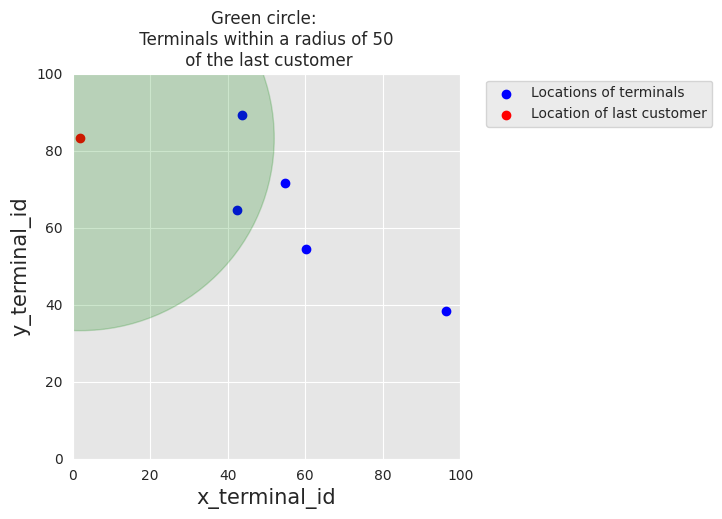

In [10]:
terminals_available_to_customer_fig

In [11]:
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]"


In [12]:
def generate_transactions_table(customer_profile, start_date = "2023-04-01", nb_days = 10):

    customer_transactions = []

    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    # For all days
    for day in range(nb_days):

        # Random number of transactions for that day
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)

        # If nb_tx positive, let us generate transactions
        if nb_tx>0:

            for tx in range(nb_tx):

                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that
                # most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))

                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):

                    # Amount is drawn from a normal distribution
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)

                    amount=np.round(amount,decimals=2)

                    if len(customer_profile.available_terminals)>0:

                        terminal_id = random.choice(customer_profile.available_terminals)

                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID,
                                                      terminal_id, amount])

    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]

    return customer_transactions



In [13]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0],
                                                         start_date = "2023-04-01",
                                                         nb_days = 5)
transaction_table_customer_0

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2023-04-01 07:19:05,0,3,123.59,26345,0
1,2023-04-01 19:02:02,0,3,46.51,68522,0
2,2023-04-01 18:00:16,0,0,77.34,64816,0
3,2023-04-02 15:13:02,0,2,32.35,141182,1
4,2023-04-02 14:05:38,0,3,63.30,137138,1
5,2023-04-02 15:46:51,0,3,13.59,143211,1
6,2023-04-02 08:51:06,0,2,54.72,118266,1
7,2023-04-02 20:24:47,0,3,51.89,159887,1
8,2023-04-03 12:15:47,0,2,117.91,216947,2
9,2023-04-03 08:50:09,0,1,67.72,204609,2


In [14]:
transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2023-04-01 07:19:05,0,3,123.59,26345,0
1,2023-04-01 19:02:02,0,3,46.51,68522,0
2,2023-04-01 18:00:16,0,0,77.34,64816,0
3,2023-04-02 15:13:02,0,2,32.35,141182,1
4,2023-04-02 14:05:38,0,3,63.30,137138,1
...,...,...,...,...,...,...
60,2023-04-05 07:41:19,4,2,111.38,373279,4
61,2023-04-05 06:59:59,4,3,80.36,370799,4
62,2023-04-05 17:23:34,4,2,53.25,408214,4
63,2023-04-05 12:51:38,4,2,36.44,391898,4


In [15]:
def generate_dataset(n_customers = 10000, n_terminals = 1000000, nb_days=90, start_date="2023-04-01", r=5):

    start_time=time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    # With Pandarallel
    #customer_profiles_table['available_terminals'] = customer_profiles_table.parallel_apply(lambda x : get_list_closest_terminals(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    customer_profiles_table['nb_terminals']=customer_profiles_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    # With Pandarallel
    #transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologically
    transactions_df=transactions_df.sort_values('TX_DATETIME')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)


In [16]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000,
                     n_terminals = 10000,
                     nb_days=183,
                     start_date="2023-04-01",
                     r=5)


Time to generate customer profiles table: 0.1s
Time to generate terminal profiles table: 0.07s
Time to associate terminals to customers: 4.9s
Time to generate transactions: 1.6e+02s


In [17]:
transactions_df.shape

(1754155, 7)

In [18]:
%%capture

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")


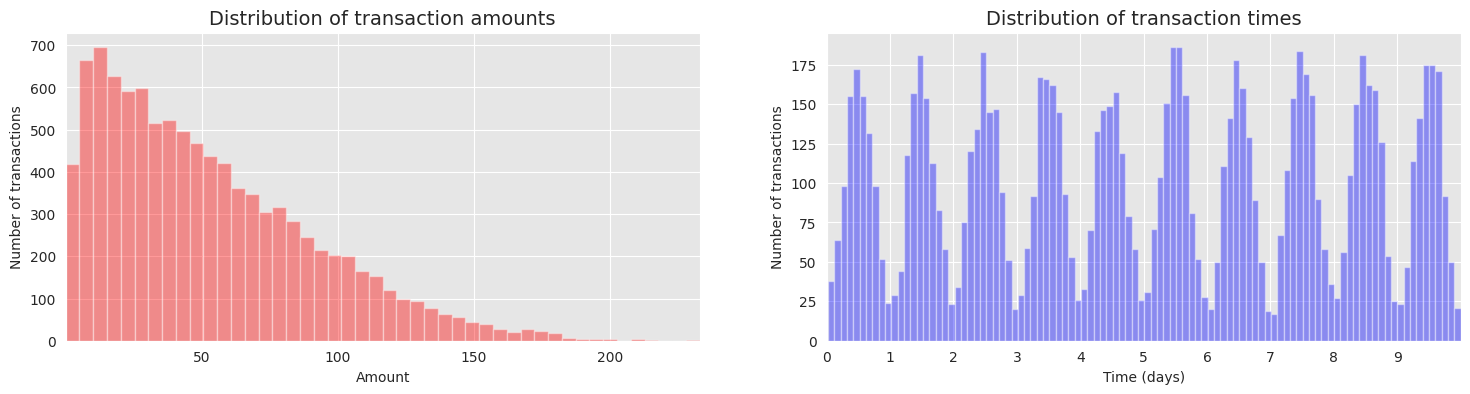

In [19]:
distribution_amount_times_fig

In [20]:
def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):

    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0

    # Scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD']=1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD_SCENARIO']=1
    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))

    # Scenario 2
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+28) &
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]

        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2

    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

    # Scenario 3
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+14) &
                                                    (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

        nb_compromised_transactions=len(compromised_transactions)


        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))

        transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=1
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3


    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    return transactions_df



In [21]:
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of frauds from scenario 1: 978
Number of frauds from scenario 2: 9099
Number of frauds from scenario 3: 4604
CPU times: user 2min 20s, sys: 455 ms, total: 2min 20s
Wall time: 2min 21s


In [22]:
transactions_df.TX_FRAUD.mean()

0.008369271814634397

In [23]:
transactions_df.TX_FRAUD.sum()

14681

In [24]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2023-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2023-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2023-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2023-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [25]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(973, 9)

In [26]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(9077, 9)

In [27]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(4631, 9)

In [28]:
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [29]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)



(Baseline_Feature_Transformation)=
# Baseline feature transformation

The simulated dataset generated in the previous section is simple. It only contains the essential features that characterize a payment card transaction. These are: a unique identifier for the transaction, the date and time of the transaction, the transaction amount, a unique identifier for the customer, a unique number for the merchant, and a binary variable that labels the transaction as legitimate or fraudulent (0 for legitimate or 1 for fraudulent). Fig. 1 provides the first three rows of the simulated dataset:

![alt text](images/tx_table.png)
<p style="text-align: center;">
Fig. 1. The first three transactions in the simulated dataset used in this chapter.
</p>



What each row essentially summarizes is that, at 00:00:31, on the 1st of April 2018, a customer with ID 596 made a payment of a value of 57.19 to a merchant with ID 3156, and that the transaction was not fraudulent. Then, at 00:02:10, on the 1st of April 2018, a customer with ID 4961 made a payment of a value of 81.51 to a merchant with ID 3412, and that the transaction was not fraudulent. And so on. The simulated dataset is a long list of such transactions (1.8 million in total). The variable `transaction_ID` is a unique identifier for each transaction.  

While conceptually simple for a human, such a set of features is however not appropriate for a machine learning predictive model. Machine learning algorithms typically require *numerical* and *ordered* features. Numerical means that the type of the variable must be an integer or a real number. Ordered means that the order of the values of a variable is meaningful.

In this dataset, the only numerical and ordered features are the transaction amount and the fraud label. The date is a Panda timestamp, and therefore not numerical. The identifiers for the transactions, customers, and terminals are numerical but not ordered: it would not make sense to assume for example that the terminal with ID 3548 is 'bigger' or 'larger' than the terminal with ID 1983. Rather, these identifiers represent distinct 'entities', which are referred to as *categorical* features.

There is unfortunately no standard procedure to deal with non-numerical or categorical features. The topic is known in the machine learning literature as *feature engineering* or *feature transformation*. In essence, the goal of feature engineering is to design new features that are assumed to be relevant for a predictive problem. The design of these features is usually problem-dependent, and involves domain knowledge.

In this section, we will implement three types of feature transformation that are known to be relevant for payment card fraud detection.

![encoding](images/encoding_variables.png)

The first type of transformation involves the date/time variable, and consists in creating binary features that characterize potentially relevant periods. We will create two such features. The first one will characterize whether a transaction occurs during a weekday or during the weekend. The second will characterize whether a transaction occurs during the day or the night. These features can be useful since it has been observed in real-world datasets that fraudulent patterns differ between weekdays and weekends, and between the day and night.  

The second type of transformation involves the customer ID and consists in creating features that characterize the customer spending behaviors. We will follow the RFM (Recency, Frequency, Monetary value) framework proposed in {cite}`VANVLASSELAER201538`, and keep track of the average spending amount and number of transactions for each customer and for three window sizes. This will lead to the creation of six new features.

The third type of transformation involves the terminal ID and consists in creating new features that characterize the 'risk' associated with the terminal. The risk will be defined as the average number of frauds that were observed on the terminal for three window sizes. This will lead to the creation of three new features.

The table below summarizes the types of transformation that will be performed and the new features that will be created.

|Original feature name|Original feature type|Transformation|Number of new features|New feature(s) type|
|---|---|---|---|---|
|TX\_DATE\_TIME | Panda timestamp |0 if transaction during a weekday, 1 if transaction during a weekend. The new feature is called TX_DURING_WEEKEND.|1|Integer (0/1)|
|TX\_DATE\_TIME | Panda timestamp |0 if transaction between 6am and 0pm, 1 if transaction between 0pm and 6am. The new feature is called TX_DURING_NIGHT.|1|Integer (0/1)|
|CUSTOMER\_ID | Categorical variable |Number of transactions by the customer in the last n day(s), for n in {1,7,30}. The new features are called CUSTOMER_ID_NB_TX_nDAY_WINDOW.|3|Integer|
|CUSTOMER\_ID | Categorical variable |Average spending amount in the last n day(s), for n in {1,7,30}. The new features are called CUSTOMER_ID_AVG_AMOUNT_nDAY_WINDOW.|3|Real|
|TERMINAL\_ID | Categorical variable |Number of transactions on the terminal in the last n+d day(s), for n in {1,7,30} and d=7. The parameter d is called delay and will be discussed later in this notebook. The new features are called TERMINAL_ID_NB_TX_nDAY_WINDOW.|3|Integer|
|TERMINAL\_ID | Categorical variable |Average number of frauds on the terminal in the last n+d day(s), for n in {1,7,30} and d=7. The parameter d is called delay and will be discussed later in this notebook. The new features are called TERMINAL_ID_RISK_nDAY_WINDOW.|3|Real|

The following sections provide the implementation for each of these three transformations. After the transformations, a set of 14 new features will be created. Note that some of the features are the result of aggregation functions over the values of other features or conditions (same customer, given time window). These features are often referred to as *aggregated features*.

In [30]:
# Initialization: Load shared functions and simulated data

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py

# # Get simulated data from Github repository
# if not os.path.exists("simulated-data-raw"):
#     !git clone https://github.com/Fraud-Detection-Handbook/simulated-data-raw


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63257  100 63257    0     0   248k      0 --:--:-- --:--:-- --:--:--  249k


<Figure size 640x480 with 0 Axes>

## Loading of dataset

Let us first load the transaction data simulated in the previous notebook. We will load the transaction files from April to September. Files can be loaded using the `read_from_files` function in the [shared functions](shared_functions) notebook. The function was put in this notebook since it will be used frequently throughout this book.

The function takes as input the folder where the data files are located, and the dates that define the period to load (between `BEGIN_DATE` and `END_DATE`). It returns a DataFrame of transactions. The transactions are sorted by chronological order.


In [31]:
DIR_INPUT='./simulated-data-raw/data/'

BEGIN_DATE = "2023-04-01"
END_DATE = "2023-09-30"

# print("Load  files")
# %time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
# print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))


In [32]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2023-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2023-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2023-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2023-04-01 00:10:34,927,9906,50.99,634,0,0,0


## Date and time transformations

We will create two new binary features from the transaction dates and times:

* The first will characterize whether a transaction occurs during a weekday (value 0) or a weekend (1), and will be called `TX_DURING_WEEKEND`
* The second will characterize whether a transaction occurs during the day or during the day (0) or during the night (1). The night is defined as hours that are between 0pm and 6am. It will be called `TX_DURING_NIGHT`.

For the `TX_DURING_WEEKEND` feature, we define a function `is_weekend` that takes as input a Panda timestamp, and returns 1 if the date is during a weekend, or 0 otherwise. The timestamp object conveniently provides the `weekday` function to help in computing this value.

In [33]:
def is_weekend(tx_datetime):

    # Transform date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5

    return int(is_weekend)


It is then straghtforward to compute this feature for all transactions using the Panda `apply` function.

In [34]:
%time transactions_df['TX_DURING_WEEKEND']=transactions_df.TX_DATETIME.apply(is_weekend)

CPU times: user 4.17 s, sys: 215 ms, total: 4.38 s
Wall time: 4.37 s


We follow the same logic to implement the `TX_DURING_NIGHT` feature. First, a function `is_night` that takes as input a Panda timestamp, and returns 1 if the time is during the night, or 0 otherwise. The timestamp object conveniently provides the hour property to help in computing this value.

In [35]:
def is_night(tx_datetime):

    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6, and 0 otherwise
    is_night = tx_hour<=6

    return int(is_night)

In [36]:
%time transactions_df['TX_DURING_NIGHT']=transactions_df.TX_DATETIME.apply(is_night)

CPU times: user 5.21 s, sys: 190 ms, total: 5.4 s
Wall time: 5.46 s


Let us check that these features where correctly computed.

In [37]:
transactions_df[transactions_df.TX_TIME_DAYS>=30]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
288062,288062,2023-05-01 00:01:21,3546,2944,18.71,2592081,30,0,0,0,1
288063,288063,2023-05-01 00:01:48,206,3521,18.60,2592108,30,0,0,0,1
288064,288064,2023-05-01 00:02:22,2610,4470,66.67,2592142,30,0,0,0,1
288065,288065,2023-05-01 00:03:15,4578,1520,79.41,2592195,30,0,0,0,1
288066,288066,2023-05-01 00:03:51,1246,7809,52.08,2592231,30,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2023-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,0
1754151,1754151,2023-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,0
1754152,1754152,2023-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,0
1754153,1754153,2023-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,0


The 2018-05-01 was a Monday, and the 2018-09-30 a Sunday. These dates are correctly flagged as weekday, and weekend, respectively. The day and night feature is also correctly set for the first transactions, that happen closely after 0 pm, and the last transactions that happen closely before 0 pm.

## Customer ID transformations

Let us now proceed with customer ID transformations. We will take inspiration from the RFM (Recency, Frequency, Monetary value) framework proposed in {cite}`VANVLASSELAER201538`, and compute two of these features over three time windows. The first feature will be the number of transactions that occur within a time window (Frequency). The second will be the average amount spent in these transactions (Monetary value). The time windows will be set to one, seven, and thirty days. This will generate six new features. Note that these time windows could later be optimized along with the models using a model selection procedure ([Chapter 5](Model_Selection)).

Let us implement these transformations by writing a `get_customer_spending_behaviour_features` function. The function takes as inputs the set of transactions for a customer and a set of window sizes. It returns a DataFrame with the six new features. Our implementation relies on the Panda `rolling` function, which makes easy the computation of aggregates over a time window.


In [38]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1,7,30]):

    # Let us first order transactions chronologically
    customer_transactions=customer_transactions.sort_values('TX_DATETIME')

    # The transaction date and time is set as the index, which will allow the use of the rolling function
    customer_transactions.index=customer_transactions.TX_DATETIME

    # For each window size
    for window_size in windows_size_in_days:

        # Compute the sum of the transaction amounts and the number of transactions for the given window size
        SUM_AMOUNT_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()

        # Compute the average transaction amount for the given window size
        # NB_TX_WINDOW is always >0 since current transaction is always included
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW/NB_TX_WINDOW

        # Save feature values
        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)

    # Reindex according to transaction IDs
    customer_transactions.index=customer_transactions.TRANSACTION_ID

    # And return the dataframe with the new features
    return customer_transactions


Let us compute these aggregates for the first customer.

In [39]:
spending_behaviour_customer_0=get_customer_spending_behaviour_features(transactions_df[transactions_df.CUSTOMER_ID==0])
spending_behaviour_customer_0

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,
1758,1758,2023-04-01 07:19:05,0,6076,123.59,26345,0,0,0,1,0,1.0,123.590000,1.0,123.590000,1.0,123.590000
8275,8275,2023-04-01 18:00:16,0,858,77.34,64816,0,0,0,1,0,2.0,100.465000,2.0,100.465000,2.0,100.465000
8640,8640,2023-04-01 19:02:02,0,6698,46.51,68522,0,0,0,1,0,3.0,82.480000,3.0,82.480000,3.0,82.480000
12169,12169,2023-04-02 08:51:06,0,6569,54.72,118266,1,0,0,1,0,3.0,59.523333,4.0,75.540000,4.0,75.540000
15764,15764,2023-04-02 14:05:38,0,7707,63.30,137138,1,0,0,1,0,4.0,60.467500,5.0,73.092000,5.0,73.092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750390,1750390,2023-09-30 13:38:41,0,3096,38.23,15773921,182,0,0,1,0,5.0,64.388000,28.0,57.306429,89.0,63.097640
1750758,1750758,2023-09-30 14:10:21,0,9441,43.60,15775821,182,0,0,1,0,6.0,60.923333,29.0,56.833793,89.0,62.433933
1751039,1751039,2023-09-30 14:34:30,0,1138,69.69,15777270,182,0,0,1,0,7.0,62.175714,29.0,57.872414,90.0,62.514556


We can check that the new features are consistent with the customer profile (see the previous notebook). For customer 0, the mean amount was `mean_amount`=62.26, and the transaction frequency was `mean_nb_tx_per_day`=2.18. These values are indeed closely matched by the features `CUSTOMER_ID_NB_TX_30DAY_WINDOW` and `CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW`, especially after 30 days.

Let us now generate these features for all customers. This is straightforward using the Panda `groupby` and `apply` methods.

In [40]:
%time transactions_df=transactions_df.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1,7,30]))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)


CPU times: user 39.6 s, sys: 816 ms, total: 40.4 s
Wall time: 40.6 s


In [41]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
0,0,2023-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1,1.0,57.160000,1.0,57.160000,1.0,57.160000
1,1,2023-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1,1.0,81.510000,1.0,81.510000,1.0,81.510000
2,2,2023-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000
3,3,2023-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1,1.0,64.490000,1.0,64.490000,1.0,64.490000
4,4,2023-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1,1.0,50.990000,1.0,50.990000,1.0,50.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2023-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,0,2.0,75.280000,12.0,67.047500,72.0,69.521111
1754151,1754151,2023-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,0,1.0,1.230000,21.0,22.173810,93.0,24.780753
1754152,1754152,2023-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,0,5.0,7.368000,21.0,7.400476,65.0,7.864462
1754153,1754153,2023-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,0,3.0,100.696667,16.0,107.052500,51.0,102.919608


## Terminal ID transformations

Finally, let us proceed with the terminal ID transformations. The main goal will be to extract a *risk score*, that assesses the exposure of a given terminal ID to fraudulent transactions. The risk score will be defined as the average number of fraudulent transactions that occurred on a terminal ID over a time window. As for customer ID transformations, we will use three window sizes, of 1, 7, and 30 days.

Contrary to customer ID transformations, the time windows will not directly precede a given transaction. Instead, they will be shifted back by a *delay period*. The delay period accounts for the fact that, in practice, the fraudulent transactions are only discovered after a fraud investigation or a customer complaint. Hence, the fraudulent labels, which are needed to compute the risk score, are only available after this delay period. To a first approximation, this delay period will be set to one week. The motivations for the delay period will be further argued in [Chapter 5, Validation strategies](Validation_Strategies).

Let us perform the computation of the risk scores by defining a `get_count_risk_rolling_window` function. The function takes as inputs the DataFrame of transactions for a given terminal ID, the delay period, and a list of window sizes. In the first stage, the number of transactions and fraudulent transactions are computed for the delay period (`NB_TX_DELAY` and `NB_FRAUD_DELAY`). In the second stage, the number of transactions and fraudulent transactions are computed for each window size plus the delay period (`NB_TX_DELAY_WINDOW` and `NB_FRAUD_DELAY_WINDOW`). The number of transactions and fraudulent transactions that occurred for a given window size, shifted back by the delay period, is then obtained by simply computing the differences of the quantities obtained for the delay period, and the window size plus delay period:

```
NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY
```

The risk score is finally obtained by computing the proportion of fraudulent transactions for each window size (or 0 if no transaction occurred for the given window):

```
RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW
```

Additionally to the risk score, the function also returns the number of transactions for each window size. This results in the addition of six new features: The risk and number of transactions, for three window sizes.


In [42]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"):

    terminal_transactions=terminal_transactions.sort_values('TX_DATETIME')

    terminal_transactions.index=terminal_transactions.TX_DATETIME

    NB_FRAUD_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()

    for window_size in windows_size_in_days:

        NB_FRAUD_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()

        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY

        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW

        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)

    terminal_transactions.index=terminal_transactions.TRANSACTION_ID

    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0)
    terminal_transactions.fillna(0,inplace=True)

    return terminal_transactions


In [43]:
transactions_df[transactions_df.TX_FRAUD==1]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
3527,3527,2023-04-01 10:17:43,3774,3059,225.41,37063,0,1,1,1,0,3.0,158.073333,3.0,158.073333,3.0,158.073333
5789,5790,2023-04-01 13:31:48,4944,6050,222.26,48708,0,1,1,1,0,2.0,127.605000,2.0,127.605000,2.0,127.605000
6549,6549,2023-04-01 14:42:02,4625,9102,226.40,52922,0,1,1,1,0,4.0,167.165000,4.0,167.165000,4.0,167.165000
9583,9583,2023-04-02 01:01:05,3814,6893,59.15,90065,1,1,3,1,1,6.0,29.138333,6.0,29.138333,6.0,29.138333
10356,10355,2023-04-02 05:03:35,2513,1143,222.04,104615,1,1,1,1,1,5.0,123.740000,5.0,123.740000,5.0,123.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753524,1753524,2023-09-30 19:51:48,1671,3192,128.60,15796308,182,1,3,1,0,6.0,138.358333,25.0,106.957200,82.0,75.621341
1753600,1753600,2023-09-30 20:09:00,4166,632,17.39,15797340,182,1,2,1,0,3.0,19.766667,19.0,15.984737,86.0,15.846512
1753673,1753673,2023-09-30 20:30:52,4097,1558,24.04,15798652,182,1,2,1,0,3.0,23.050000,16.0,40.440625,63.0,41.877460
1754014,1754014,2023-09-30 22:27:04,100,8604,73.85,15805624,182,1,3,1,0,2.0,48.010000,26.0,30.384231,103.0,23.627184


Let us compute these six features for the first terminal ID containing at least one fraud:

In [44]:
# Get the first terminal ID that contains frauds
transactions_df[transactions_df.TX_FRAUD==0].TERMINAL_ID[0]

3156

In [45]:
get_count_risk_rolling_window(transactions_df[transactions_df.TERMINAL_ID==3059], delay_period=7, windows_size_in_days=[1,7,30])

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
3527,3527,2023-04-01 10:17:43,3774,3059,225.41,37063,0,1,1,1,...,3.0,158.073333,3.0,158.073333,0.0,0.0,0.0,0.0,0.0,0.0
4732,4732,2023-04-01 11:59:14,55,3059,36.28,43154,0,0,0,1,...,2.0,35.670000,2.0,35.670000,0.0,0.0,0.0,0.0,0.0,0.0
16216,16216,2023-04-02 14:47:34,4879,3059,105.00,139654,1,0,0,1,...,10.0,76.010000,10.0,76.010000,0.0,0.0,0.0,0.0,0.0,0.0
18249,18249,2023-04-02 19:08:10,2263,3059,90.89,155290,1,0,0,1,...,7.0,50.458571,7.0,50.458571,0.0,0.0,0.0,0.0,0.0,0.0
26512,26512,2023-04-03 15:44:49,4879,3059,58.51,229489,2,0,0,0,...,14.0,71.070000,14.0,71.070000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697944,1697944,2023-09-25 05:32:56,402,3059,57.30,15312776,177,0,0,0,...,14.0,65.167857,46.0,68.163261,1.0,0.0,9.0,0.0,36.0,0.0
1701971,1701971,2023-09-25 12:30:54,1035,3059,7.56,15337854,177,0,0,0,...,23.0,7.052174,107.0,6.763738,2.0,0.0,10.0,0.0,36.0,0.0
1704512,1704512,2023-09-25 16:37:41,1519,3059,35.79,15352661,177,0,0,0,...,7.0,41.404286,30.0,46.780000,1.0,0.0,9.0,0.0,36.0,0.0


We can check that the first fraud occurred on the 2018/09/10, and that risk scores only start being counted with a one-week delay.

Let us finally generate these features for all terminals. This is straightforward using the Panda `groupby` and `apply` methods.

In [46]:
%time transactions_df=transactions_df.groupby('TERMINAL_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)


CPU times: user 1min 33s, sys: 550 ms, total: 1min 34s
Wall time: 1min 34s


In [47]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2023-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.00000
1,1,2023-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.00000
2,2,2023-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.00000
3,3,2023-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.00000
4,4,2023-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2023-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,...,12.0,67.047500,72.0,69.521111,1.0,0.0,4.0,0.0,28.0,0.00000
1754151,1754151,2023-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,...,21.0,22.173810,93.0,24.780753,1.0,0.0,9.0,0.0,39.0,0.00000
1754152,1754152,2023-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,...,21.0,7.400476,65.0,7.864462,1.0,0.0,5.0,0.0,33.0,0.00000
1754153,1754153,2023-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,...,16.0,107.052500,51.0,102.919608,1.0,0.0,6.0,0.0,28.0,0.00000


## Saving of dataset

Let us finally save the dataset, split into daily batches, using the pickle format.

In [48]:
# DIR_OUTPUT = "./simulated-data-transformed/"

# if not os.path.exists(DIR_OUTPUT):
#     os.makedirs(DIR_OUTPUT)

# start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

# for day in range(transactions_df.TX_TIME_DAYS.max()+1):

#     transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')

#     date = start_date + datetime.timedelta(days=day)
#     filename_output = date.strftime("%Y-%m-%d")+'.pkl'

#     # Protocol=4 required for Google Colab
#     transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

The generated dataset is also available from Github at `https://github.com/Fraud-Detection-Handbook/simulated-data-transformed`.

In [49]:
# !curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
# %run shared_functions.py

In [50]:
BEGIN_DATE = "2023-07-25"
END_DATE = "2023-08-14"

In [51]:
# Compute the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_tx_stats(transactions_df, start_date_df="2023-04-01"):

    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraudulent_transactions_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of compromised cards per day
    nb_compromised_cards_per_day=transactions_df[transactions_df['TX_FRAUD']==1].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    tx_stats=pd.DataFrame({"nb_tx_per_day":nb_tx_per_day,
                           "nb_fraudulent_transactions_per_day":nb_fraudulent_transactions_per_day,
                           "nb_compromised_cards_per_day":nb_compromised_cards_per_day})

    tx_stats=tx_stats.reset_index()

    start_date = datetime.datetime.strptime(start_date_df, "%Y-%m-%d")
    tx_date=start_date+tx_stats['TX_TIME_DAYS'].apply(datetime.timedelta)

    tx_stats['tx_date']=tx_date

    return tx_stats

tx_stats=get_tx_stats(transactions_df, start_date_df="2023-04-01")

In [52]:
%%capture

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day

def get_template_tx_stats(ax ,fs,
                          start_date_training,
                          title='',
                          delta_train=7,
                          delta_delay=7,
                          delta_test=7,
                          ylim=300):

    ax.set_title(title, fontsize=fs*1.5)
    ax.set_ylim([0, ylim])

    ax.set_xlabel('Date', fontsize=fs)
    ax.set_ylabel('Number', fontsize=fs)

    plt.yticks(fontsize=fs*0.7)
    plt.xticks(fontsize=fs*0.7)

    ax.axvline(start_date_training+datetime.timedelta(days=delta_train), 0,ylim, color="black")
    ax.axvline(start_date_test, 0, ylim, color="black")

    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-20,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-20,'Test period', fontsize=fs)


cmap = plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0),
        'nb_fraudulent_transactions_per_day':cmap(200),
        'nb_compromised_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2023-07-25", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)

get_template_tx_stats(ax, fs=20,
                      start_date_training=start_date_training,
                      title='Total transactions, and number of fraudulent transactions \n and number of compromised cards per day',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# compromised cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)

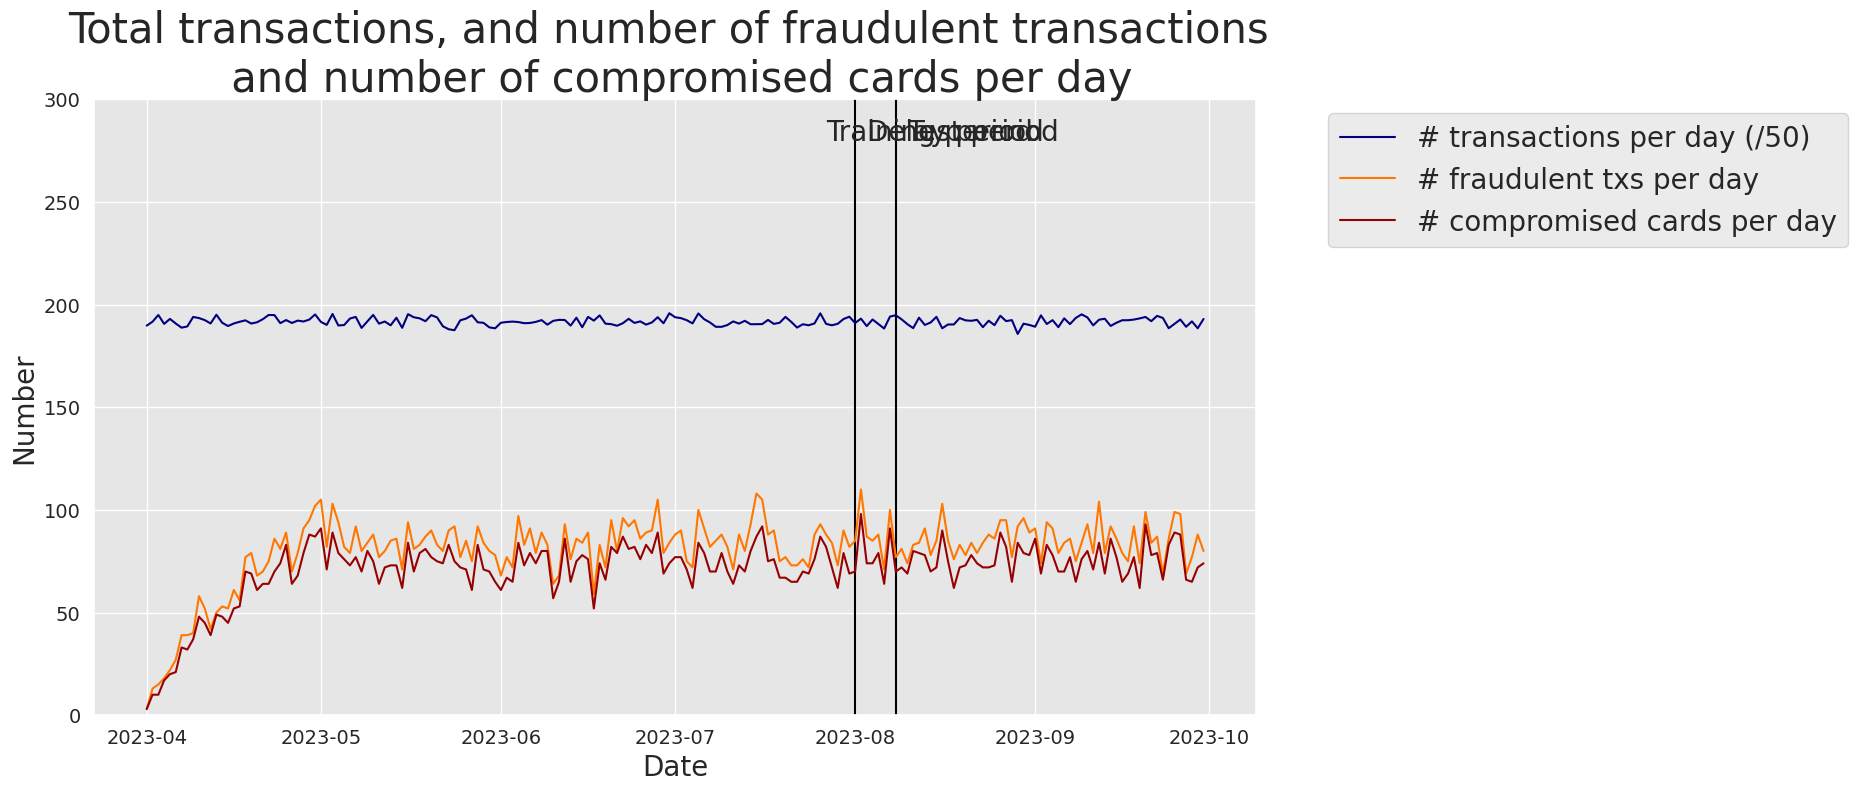

In [53]:
fraud_and_transactions_stats_fig

In [54]:
df_0 = transactions_df[transactions_df['TX_FRAUD']== 0].sample(n= 14681, random_state=42)
df_1= transactions_df[transactions_df['TX_FRAUD'] == 1].sample(n= 14681, random_state=42)
print(f' Fraud Shape{df_1.shape}\n No Fraud shape{df_0.shape}')

 Fraud Shape(14681, 23)
 No Fraud shape(14681, 23)


In [55]:
transactions_df=pd.concat([df_0,df_1], ignore_index=True)

In [56]:
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       delta_train=7,delta_delay=7,delta_test=7)

In [57]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

In [58]:
# We first create a decision tree object. We will limit its depth to 2 for interpretability,
# and set the random state to zero for reproducibility
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df,
                                                                 input_features, output_feature,
                                                                 scale=False)

In [59]:
test_df['TX_FRAUD_PREDICTED']=model_and_predictions_dictionary['predictions_test']
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED
25946,1236712,2023-08-08 00:15:38,323,8107,20.50,11146538,129,1,3,0,...,10.741905,89.0,8.819551,2.0,0.0,10.0,0.0,34.0,0.000000,0.261044
21343,1236813,2023-08-08 01:21:05,2375,4303,40.80,11150465,129,1,3,0,...,29.352143,51.0,23.326667,0.0,0.0,4.0,0.0,27.0,0.037037,0.261044
1650,1236900,2023-08-08 02:09:36,4680,6579,1.35,11153376,129,0,0,0,...,74.874643,95.0,81.105368,1.0,0.0,2.0,0.0,25.0,0.000000,0.261044
13529,1237160,2023-08-08 03:34:26,1604,7235,134.83,11158466,129,0,0,0,...,89.135385,101.0,80.178317,2.0,0.0,8.0,0.0,30.0,0.000000,0.261044
8339,1237171,2023-08-08 03:37:07,1523,8452,126.70,11158627,129,0,0,0,...,75.569500,86.0,62.177674,3.0,0.0,9.0,0.0,34.0,0.000000,0.261044


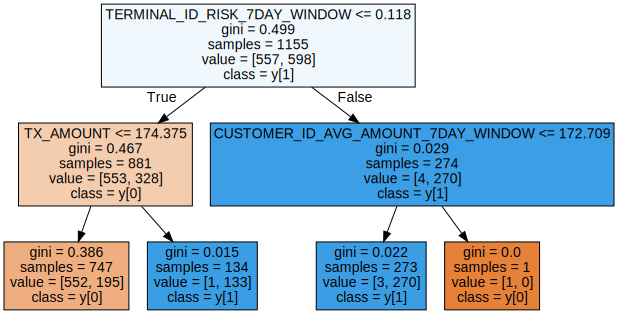

In [60]:
display(graphviz.Source(sklearn.tree.export_graphviz(classifier,feature_names=input_features,class_names=True, filled=True)))

In [61]:
def fit_model_and_get_predictions(classifier, train_df, test_df,
                                  input_features, output_feature="TX_FRAUD",scale=True,ClassiferName=''):

    # By default, scales input data
    if scale:
        (train_df, test_df)=scaleData(train_df,test_df,input_features)

    # We first train the classifier using the `fit` method, and pass as arguments the input and output features
    start_time=time.time()
    classifier.fit(train_df[input_features], train_df[output_feature])
    joblib.dump(classifier, ClassiferName+'.joblib')
    training_execution_time=time.time()-start_time

    # We then get the predictions on the training and test data using the `predict_proba` method
    # The predictions are returned as a numpy array, that provides the probability of fraud for each transaction
    start_time=time.time()
    predictions_test=classifier.predict_proba(test_df[input_features])[:,1]
    prediction_execution_time=time.time()-start_time

    predictions_train=classifier.predict_proba(train_df[input_features])[:,1]

    # The result is returned as a dictionary containing the fitted models,
    # and the predictions on the training and test sets
    model_and_predictions_dictionary = {'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }

    return model_and_predictions_dictionary

In [62]:
classifiers_dictionary={'Logistic regression':sklearn.linear_model.LogisticRegression(random_state=0),
                        'Decision tree with depth of two':sklearn.tree.DecisionTreeClassifier(max_depth=2,random_state=0),
                        'Decision tree - unlimited depth':sklearn.tree.DecisionTreeClassifier(random_state=0),
                        'Random forest':sklearn.ensemble.RandomForestClassifier(random_state=0,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=0,n_jobs=-1),
                       }

fitted_models_and_predictions_dictionary={}

for classifier_name in classifiers_dictionary:

    model_and_predictions = fit_model_and_get_predictions(classifiers_dictionary[classifier_name], train_df, test_df,
                                                                                  input_features=input_features,
                                                                                output_feature=output_feature,
                                                         ClassiferName=classifier_name )
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

In [63]:
def performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                            transactions_df,
                                            type_set='test',
                                            top_k_list=[100]):

    performances=pd.DataFrame()

    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():

        predictions_df=transactions_df

        predictions_df['predictions']=model_and_predictions['predictions_'+type_set]

        performances_model=performance_assessment(predictions_df, output_feature='TX_FRAUD',
                                                   prediction_feature='predictions', top_k_list=top_k_list)
        performances_model.index=[classifier_name]

        performances=performances.append(performances_model)

    return performances

In [64]:
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df,
                                                        type_set='test',
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.864,0.887,0.383
Decision tree with depth of two,0.814,0.770,0.389
Decision tree - unlimited depth,0.775,0.654,0.387
Random forest,0.868,0.892,0.381
XGBoost,0.860,0.883,0.384


In [65]:
# Execution times
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic regression,0.033581,0.003804
Decision tree with depth of two,0.009485,0.003192
Decision tree - unlimited depth,0.018982,0.003915
Random forest,0.397973,0.044342
XGBoost,0.129597,0.007475


In [66]:
test_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED,predictions
25946,1236712,2023-08-08 00:15:38,323,8107,-0.619519,11146538,129,1,3,-0.649934,...,0.408189,-1.480675,0.928875,-0.404631,0.978730,-0.526203,0.560251,-0.488343,0.261044,0.498092
21343,1236813,2023-08-08 01:21:05,2375,4303,-0.439534,11150465,129,1,3,-0.649934,...,-0.928383,-1.046944,-0.976722,-0.404631,-1.026177,-0.526203,-0.306498,-0.292451,0.261044,0.467557
1650,1236900,2023-08-08 02:09:36,4680,6579,-0.789307,11153376,129,0,0,-0.649934,...,0.619227,0.680514,-0.023923,-0.404631,-1.694479,-0.526203,-0.554140,-0.488343,0.261044,0.200849
13529,1237160,2023-08-08 03:34:26,1604,7235,0.394158,11158466,129,0,0,-0.649934,...,0.830264,0.652798,0.928875,-0.404631,0.310428,-0.526203,0.064966,-0.488343,0.261044,0.036302
8339,1237171,2023-08-08 03:37:07,1523,8452,0.322076,11158627,129,0,0,-0.649934,...,0.302670,0.114617,1.881674,-0.404631,0.644579,-0.526203,0.560251,-0.488343,0.261044,0.278679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18619,1303376,2023-08-14 20:45:35,1343,79,-0.041617,11738735,135,1,2,-0.649934,...,-0.576654,0.221652,-0.976722,-0.404631,0.978730,1.285286,0.312609,0.668644,0.989011,0.998144
629,1303474,2023-08-14 21:21:39,1852,2534,-0.325071,11740899,135,0,0,-0.649934,...,0.126805,0.537594,-0.976722,-0.404631,-2.362782,-0.526203,-1.916175,-0.488343,0.261044,0.020119
16518,1303511,2023-08-14 21:35:18,2984,8584,-0.573858,11741718,135,1,2,-0.649934,...,0.302670,0.797971,-0.976722,-0.404631,-1.694479,2.061638,-0.801783,1.581298,0.989011,0.999886
7527,1303607,2023-08-14 22:17:21,3765,4055,-0.693907,11744241,135,0,0,-0.649934,...,0.373016,-1.443177,-0.023923,-0.404631,2.315335,-0.526203,0.931715,-0.488343,0.261044,0.051882


In [67]:
# Sample customer transaction data (replace this with your customer's actual transaction data)
customer_transaction = {
    'TX_AMOUNT': 10000000.36,
    'TX_DATETIME': '2023-07-27 14:30:00' ,
    'CUSTOMER_ID_NB_TX_1DAY_WINDOW' : 10,
    'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW' : 50.75,
    'CUSTOMER_ID_NB_TX_7DAY_WINDOW' : 60,
    'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW': 48.25,
    'CUSTOMER_ID_NB_TX_30DAY_WINDOW' : 200,
    'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW' : 45.0,
    'TERMINAL_ID_NB_TX_1DAY_WINDOW' : 5,
    'TERMINAL_ID_RISK_1DAY_WINDOW' :0.1,
    'TERMINAL_ID_NB_TX_7DAY_WINDOW' : 40,
    'TERMINAL_ID_RISK_7DAY_WINDOW' : 0.08,
    'TERMINAL_ID_NB_TX_30DAY_WINDOW' : 150,
    'TERMINAL_ID_RISK_30DAY_WINDOW' : 0.12,
}



In [68]:
# Convert dictionary to DataFrame
customer_transaction_df = pd.DataFrame(customer_transaction, index=[0])
customer_transaction_df

,TX_AMOUNT,TX_DATETIME,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,10000000.36,2023-07-27 14:30:00,10,50.75,60,48.25,200,45.0,5,0.1,40,0.08,150,0.12


In [69]:
customer_transaction_df['TX_DATETIME'] = pd.to_datetime(customer_transaction_df['TX_DATETIME'])

In [70]:
customer_transaction_df['TX_DURING_NIGHT']=customer_transaction_df.TX_DATETIME.apply(is_night)
customer_transaction_df['TX_DURING_WEEKEND']=customer_transaction_df.TX_DATETIME.apply(is_weekend)

In [71]:
customer_features = customer_transaction_df[input_features]
customer_features

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,10000000.36,0,0,10,50.75,60,48.25,200,45.0,5,0.1,40,0.08,150,0.12


In [72]:
import joblib

# Load the trained model
classifier = joblib.load('/content/Random forest.joblib')

# Perform prediction using the loaded model
predictions = classifier.predict(customer_features)

# Display the predictions
print('Predicted Fraud Status:', predictions)


Predicted Fraud Status: [1]
